In [1]:
#Вычислительная математика. Лабораторная работа 1: Численное дифференцирование

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math as m
%matplotlib inline

In [7]:
#Задаем функцию и ее производные, которые мы будем использовать
def f(x:float):
    return np.sin(x)
    
def first_derivative(x:float):
    return np.cos(x)
    
def second_derivative(x:float):
    return -np.sin(x)
#Задаем шаг разбиения и его границы
step = np.pi / 61
left_bound = 0 * np.pi
right_bound = 2 * np.pi

In [8]:
args = np.arange(left_bound, right_bound, step)[:122]
points = np.sin(args)
small_steps = np.arange(left_bound, right_bound, 0.005)

In [9]:
from functools import partial

def apply_derivative(points:list, step:float, derivative):
    f = partial(derivative, points, step)
    return list(map(f, range(len(points))))

In [10]:
#Первая производная с первым порядком
def first_der_first_order(points:list, step:float, i:int):
    l = len(points)
    return (points[(i + 1) % l] - points[i]) / step

In [11]:
#Первая производная с вторым порядком точности
def first_der_second_order(points:list, step:float, i:int):
    l = len(points)
    return (-0.5 * points[i - 1] + 0.5 * points[(i + 1) % l]) / step

<function matplotlib.pyplot.show(close=None, block=None)>

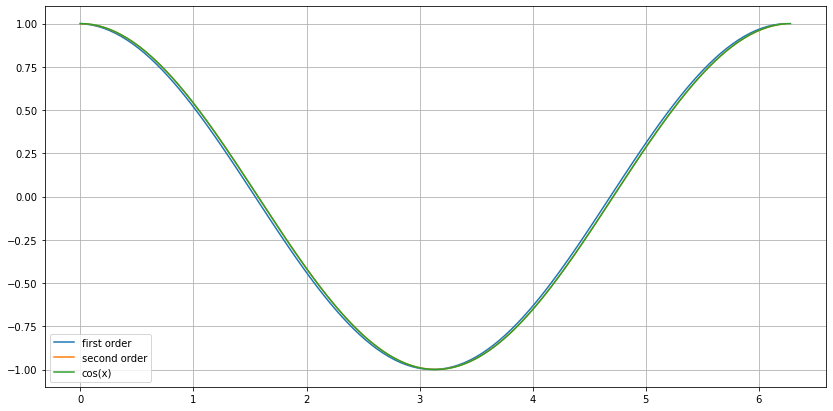

In [12]:
#сравнение точности
plt.figure(figsize=(14, 7))

plt.plot(args, apply_derivative(points, step, first_der_first_order), label = 'first order')
plt.plot(args, apply_derivative(points, step, first_der_second_order), label = 'second order')
plt.plot(small_steps, np.cos(small_steps), label = 'cos(x)')
plt.legend()
plt.grid()

plt.show

In [13]:
#Вторая производная с первым порядком точности
def second_der_first_order(points:list, step:float, i:int):
    l = len(points)
    return (points[i] - 2 * points[(i + 1) % l] + points[(i + 2) % l]) / (step * step)

In [14]:
#Вторая производная со вторым порядком точности
def second_der_second_order(points:list, step:float, i:int):
    l = len(points)
    return (2 * points[i] - 5 * points[(i + 1) % l] + 4 * points[(i + 2) % l] - points[(i + 3) % l]) / (step * step)

<function matplotlib.pyplot.show(close=None, block=None)>

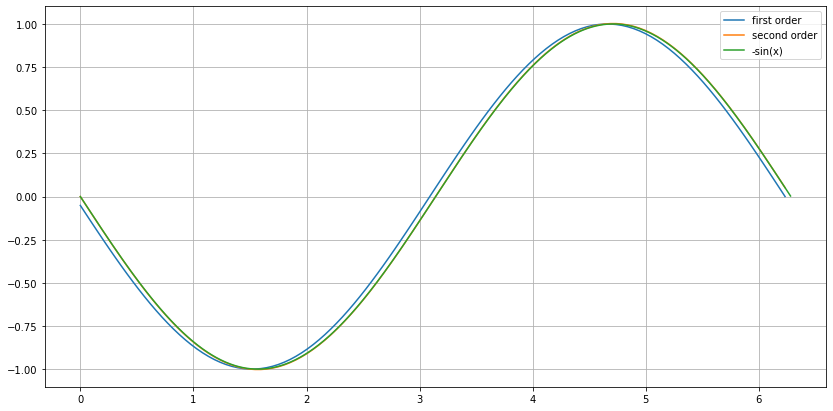

In [15]:
#сравнение точности
plt.figure(figsize=(14, 7))

plt.plot(args, apply_derivative(points, step, second_der_first_order), label = 'first order')
plt.plot(args, apply_derivative(points, step, second_der_second_order), label = 'second order')
plt.plot(small_steps, -1 * np.sin(small_steps), label = '-sin(x)')
plt.legend()
plt.grid()

plt.show

In [16]:
#Пришло время посмотреть как зависят погрешности от шага сетки.
#Для этого сгенерируем сетки с разными шагами.

dif_step = 0.0001
start_step = 0.0002
end_step = 0.01

In [17]:
def deviations_for_graph(derivative, derivative_approx):
    result = [[], []]
    
    for step_amt in range(20, 201, 5):
        step = np.pi / step_amt
        args = np.arange(left_bound, right_bound, step)[:(step_amt * 2)]
        points = np.sin(args)
        ders = derivative(args)
        ders_approx = np.array(apply_derivative(points, step, derivative_approx))
        result[0].append(step)
        result[1].append(np.max(np.abs(ders - ders_approx)))
        
    return np.array(result[0]), np.array(result[1])

In [18]:
#Функция для отрисовки


def my_plot():
    diff11 = deviations_for_graph(first_derivative, first_der_first_order)
    diff12 = deviations_for_graph(first_derivative, first_der_second_order)
    diff21 = deviations_for_graph(second_derivative, second_der_first_order)
    diff22 = deviations_for_graph(second_derivative, second_der_second_order)
    
    plt.plot(diff11[0], diff11[1], label = "1 der 1 order")
    plt.plot(diff12[0], diff12[1], label = "1 der 2 order")
    plt.plot(diff21[0], diff21[1], label = "2 der 1 order")
    plt.plot(diff22[0], diff22[1], label = "2 der 2 order")
    plt.xlabel('step')
    plt.ylabel('deviation')
    plt.legend()
    plt.grid()
    
    plt.show()

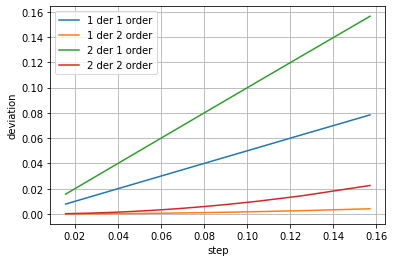

In [19]:
my_plot()

In [20]:
def log_deviations_for_graph(f, diff):
    x, y = deviations_for_graph(f, diff)
    return np.log(x), np.log(y)

In [21]:
def my_log_plot():
    diff11 = log_deviations_for_graph(first_derivative, first_der_first_order)
    diff12 = log_deviations_for_graph(first_derivative, first_der_second_order)
    diff21 = log_deviations_for_graph(second_derivative, second_der_first_order)
    diff22 = log_deviations_for_graph(second_derivative, second_der_second_order)

    
    plt.plot(diff11[0], diff11[1], label = "1 der 1 order")
    plt.plot(diff12[0], diff12[1], label = "1 der 2 order")
    plt.plot(diff21[0], diff21[1], label = "2 der 1 order")
    plt.plot(diff22[0], diff22[1], label = "2 der 2 order")
    plt.xlabel('log(step)')
    plt.ylabel('log(deviation)')
    plt.legend()
    plt.grid()
    
    plt.show()
    
    z11 = np.polyfit(diff11[0], diff11[1], 1)
    p11 = np.poly1d(z11)
    print ("1 der first order: y=%.6fx+(%.6f)"%(z11[0],z11[1]))
    
    z12 = np.polyfit(diff12[0], diff12[1], 1)
    p12 = np.poly1d(z12)
    print ("1 der second order: y=%.6fx+(%.6f)"%(z12[0],z12[1]))
    
    z21 = np.polyfit(diff21[0], diff21[1], 1)
    p21 = np.poly1d(z21)
    print ("2 der first order: y=%.6fx+(%.6f)"%(z21[0],z21[1]))
    
    z22 = np.polyfit(diff22[0], diff22[1], 1)
    p22 = np.poly1d(z22)
    print ("2 der second order: y=%.6fx+(%.6f)"%(z22[0],z22[1]))

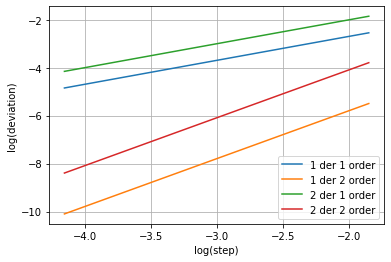

1 der first order: y=0.999550x+(-0.694857)
1 der second order: y=1.999670x+(-1.793019)
2 der first order: y=0.998899x+(-0.004202)
2 der second order: y=1.998928x+(-0.091118)


In [22]:
my_log_plot()